# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akhiril Anwar Harahap
- **Email:** akhirilanwar5@gmail.com
- **ID Dicoding:** akhirilanwarharahap

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepedda beberapa 2 tahun terakhir?

- Kapan musim dengan jumlah sewa sepeda paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [ ]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
100% 286k/286k [00:00<00:00, 678kB/s]
100% 286k/286k [00:00<00:00, 677kB/s]


In [ ]:
#baca zip
zip_ref = zipfile.ZipFile('bike-sharing-dataset.zip', 'r')
# extrak zip dan simpan di folder dataset
zip_ref.extractall('dataset/')
#mengakhiri penggunaan file ZIP yang telah dibuka dengan library zipfile di Python
zip_ref.close()

memuat dataset day.csv


In [ ]:
day_df = pd.read_csv('dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


memuat dataset hour.csv

In [ ]:
hour_df = pd.read_csv('dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat bahwa tipe data untuk dteday tidak sesuai, oleh karena itu harus dirubah ke tipe data datetime

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada data di atas

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada di atas

In [ ]:
print("Jumlah data duplicate :", day_df.duplicated().sum())
print("Jumlah data duplicate :", hour_df.duplicated().sum())

Jumlah data duplicate : 0
Jumlah data duplicate : 0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Merubah tipe data dteday jadi datetime

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Exploratory Data Analysis (EDA)

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Explore ...

In [ ]:
hour_df.groupby(by='hr').count().sort_values(by='cnt').sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
hr,,,,,,,,,,,,,,,,
17,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
16,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
15,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729
14,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729
13,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729,729
12,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728
23,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728
21,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728
20,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728


Jam dengan sewa sepeda paling tinggi adalah pada pukul 5 sore dan jam dengan sewa sepeda paling sedikit adalah pada pukul 3 pagi

In [ ]:
day_df.groupby(by='season').count().sort_values(by='cnt', ascending=False)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
3,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
2,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
1,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
4,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178


season (1:springer, 2:summer, 3:fall, 4:winter)

Diperoleh informasi bahwa jumlah sewa sepeda paling banyak adalah pada musim gugur (fall) sedangkan jumlah sewa paling sedikit adalah pada musim salju (winter)

In [ ]:
day_df.groupby(by='weekday').agg({"casual": "sum", "registered": "sum"}).sort_values(by='casual',ascending=False)

,casual,registered
weekday,,
6,153852,323955
0,140521,303506
5,78238,409552
1,70784,384719
4,61460,423935
2,57843,411266
3,57319,415729


In [ ]:
day_df.groupby(by='weekday').agg({"casual": "sum", "registered": "sum"}).sort_values(by='registered',ascending=False)

,casual,registered
weekday,,
4,61460,423935
3,57319,415729
2,57843,411266
5,78238,409552
1,70784,384719
6,153852,323955
0,140521,303506


Diperoleh informasi bahwa hari sabtu dan kamis adalah hari dengan sewa sepeda tertinggi untuk casual dan registered customer

## Visualization & Explanatory Analysis

In [ ]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Pertanyaan 1:

In [ ]:
monthly_orders_df = hour_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt": "Count of Rental"
}, inplace=True)
monthly_orders_df.head(24)

,dteday,Count of Rental
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691
8,2011-09,127418
9,2011-10,123511


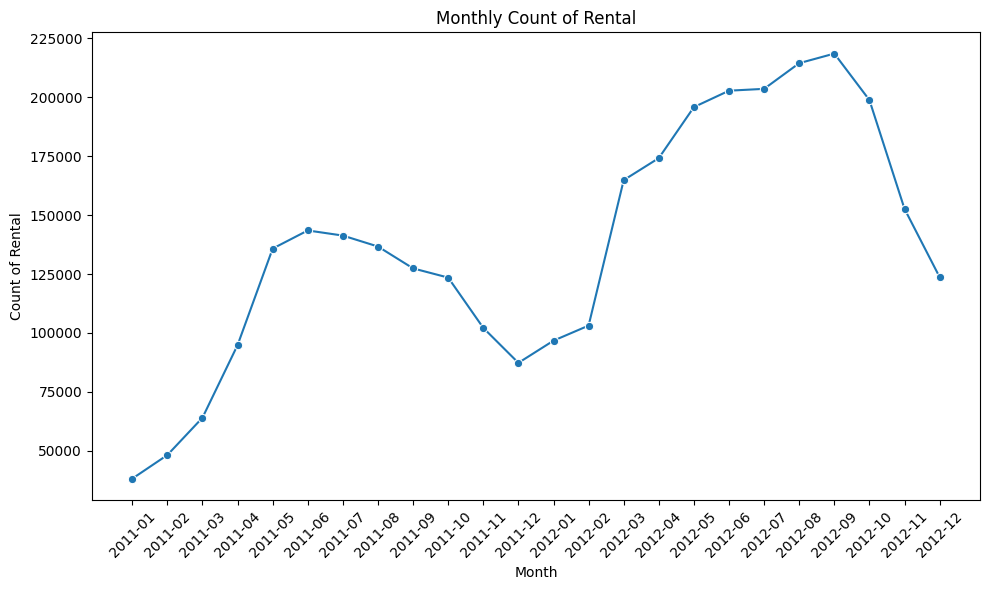

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe yang telah diubah sesuai dengan deskripsi Anda
monthly_orders_df = hour_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt": "revenue"
}, inplace=True)

# Membuat line chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

sns.lineplot(x='dteday', y='revenue', data=monthly_orders_df, marker='o')

plt.title('Monthly Count of Rental')  # Judul plot
plt.xlabel('Month')           # Label sumbu x
plt.ylabel('Count of Rental')         # Label sumbu y

plt.xticks(rotation=45)       # Memutar label sumbu x agar tidak bertabrakan
plt.tight_layout()            # Menyesuaikan layout agar tidak tumpang tindih

plt.show()  # Menampilkan plot


### Pertanyaan 2:

In [ ]:
day_df.groupby(by='weekday').agg({"cnt": "sum"}).sort_values(by='cnt',ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


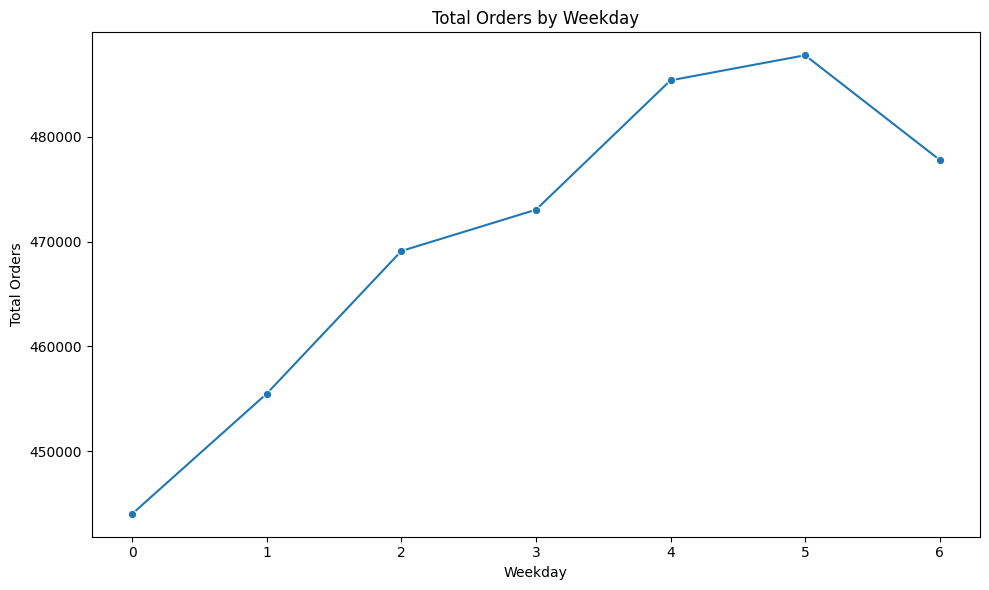

In [ ]:
# Grup berdasarkan weekday, menjumlahkan cnt, kemudian mengurutkan
weekday_counts = day_df.groupby(by='weekday').agg({"cnt": "sum"}).sort_values(by='cnt', ascending=False)

# Membuat line chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran plot

sns.lineplot(x=weekday_counts.index, y=weekday_counts['cnt'], marker='o')

plt.title('Total Orders by Weekday')  # Judul plot
plt.xlabel('Weekday')                 # Label sumbu x
plt.ylabel('Total Orders')            # Label sumbu y

plt.xticks()  # Memutar label sumbu x agar tidak bertabrakan
plt.tight_layout()       # Menyesuaikan layout agar tidak tumpang tindih

plt.show()  # Menampilkan plot

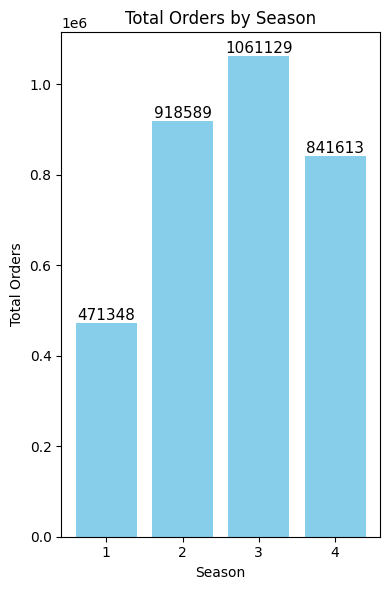

In [ ]:
import matplotlib.pyplot as plt

# Grup berdasarkan season, menjumlahkan cnt
season_counts = day_df.groupby(by='season').agg({"cnt": "sum"})

# Membuat bar chart
plt.figure(figsize=(4, 6))  # Mengatur ukuran plot

bars = plt.bar(season_counts.index, season_counts['cnt'], color='skyblue')

plt.title('Total Orders by Season')  # Judul plot
plt.xlabel('Season')                 # Label sumbu x
plt.ylabel('Total Orders')           # Label sumbu y

plt.xticks(rotation=0)  # Memutar label sumbu x agar tidak bertabrakan
plt.tight_layout()       # Menyesuaikan layout agar tidak tumpang tindih

# Menambahkan label nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()  # Mendapatkan tinggi bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=11)

plt.show()  # Menampilkan plot


## Conclusion

- Bagaimana performa penyewaan sepeda 2 tahun terakhir?
Jumlah pelanggan yang menyewa sepeda 2 tahun terakhir cukup bervariasi. Terlihat bahwa di awal hingga pertengahan tahun mengalami kenaikan, namun menjelang akhir tahun justru mengalami penurunan

- Kapan musim dengan jumlah sewa sepeda paling banyak dan paling sedikit?
Diperoleh informasi bahwa jumlah sewa sepeda paling banyak adalah pada musim gugur (fall) sedangkan jumlah sewa paling sedikit adalah pada musim salju (winter)



In [ ]:
hour_df.to_csv("hour_df_clean.csv", index=False)